In [33]:
#import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import scipy.stats as st
import seaborn as sn

In [34]:
#import data files
reviews_path = "Resources/reviews_LA.csv"
listings_path = "Resources/listings_LA.csv"
neighborhoods_path = "Resources/neighbourhoods_LA.csv"


In [35]:
# setting up the data to read in pandas
df_reviews = pd.read_csv(reviews_path)
df_neighborhoods=pd.read_csv(neighborhoods_path)
df_listings = pd.read_csv(listings_path)
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,770565020594037590,Phillips Ranch room with a view,30603612,Yamileth,Other Cities,Pomona,34.031856,-117.777994,Private room,61,5,1,2022-12-26,0.42,5,27,1,NaN
1,777451666060243581,Family oriented home,490709958,Dana,Unincorporated Areas,Castaic Canyons,34.439250,-118.444090,Private room,399,3,0,NaN,NaN,1,87,0,NaN
2,698097753730921190,方便易居驿站,444692513,Hanna,Other Cities,Pomona,34.048480,-117.768870,Private room,46,3,5,2023-01-16,0.86,4,87,5,NaN
3,13063118,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,41736985,Beth,Other Cities,Rancho Palos Verdes,33.738420,-118.395800,Private room,408,3,53,2022-11-26,0.64,10,270,13,NaN
4,39337076,Brand New Duplex Near World Cruise Center,208375458,Jae,Other Cities,Rancho Palos Verdes,33.748420,-118.311000,Private room,80,2,44,2023-02-24,1.09,4,357,26,NaN


In [36]:
# calculatng the unique number of neighbourhoods 
neighbourhood_count  = len(df_listings["neighbourhood"].unique())
print(f"there are {neighbourhood_count} unique neighbourhoods")

there are 265 unique neighbourhoods


In [37]:
# calculating the total number of host_id
host_total=len(df_listings["host_id"].unique())
print(f"there are a total of {host_total} unique hosts") 

there are a total of 21246 unique hosts


In [38]:
# creating data frame with fillna() and adding a new column with booked nights.
df_cleaned= df_listings.fillna(0)
df_cleaned['Booked_Nights'] = 365 - df_cleaned['availability_365']
df_cleaned.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Booked_Nights
0,770565020594037590,Phillips Ranch room with a view,30603612,Yamileth,Other Cities,Pomona,34.031856,-117.777994,Private room,61,5,1,2022-12-26,0.42,5,27,1,0,338
1,777451666060243581,Family oriented home,490709958,Dana,Unincorporated Areas,Castaic Canyons,34.439250,-118.444090,Private room,399,3,0,0,0.00,1,87,0,0,278
2,698097753730921190,方便易居驿站,444692513,Hanna,Other Cities,Pomona,34.048480,-117.768870,Private room,46,3,5,2023-01-16,0.86,4,87,5,0,278
3,13063118,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,41736985,Beth,Other Cities,Rancho Palos Verdes,33.738420,-118.395800,Private room,408,3,53,2022-11-26,0.64,10,270,13,0,95
4,39337076,Brand New Duplex Near World Cruise Center,208375458,Jae,Other Cities,Rancho Palos Verdes,33.748420,-118.311000,Private room,80,2,44,2023-02-24,1.09,4,357,26,0,8


In [39]:
df_clean_LA=df_cleaned.loc[(df_cleaned["neighbourhood_group"]=="City of Los Angeles")& 
                              (df_cleaned["number_of_reviews"]!=0)]
df_clean_LA.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Booked_Nights
6,51859630,"Single BR with King size bed, and shared bathroom",28407733,Arthur,City of Los Angeles,San Pedro,33.73928,-118.299110,Private room,55,2,3,2023-02-24,3.00,1,1,3,0,364
62,692376005462364487,Guesthouse in Los Ángeles,474760371,Mario,City of Los Angeles,Northridge,34.25615,-118.547287,Entire home/apt,175,2,13,2023-03-05,2.12,1,347,13,HSR22-002700,18
63,706447553284084730,Luxurious Villa w/ Lap Pool Outdoor Kitchen,410194448,Andrik,City of Los Angeles,Granada Hills,34.26513,-118.509430,Entire home/apt,725,2,10,2023-02-23,2.94,24,294,10,HSR22-003535,71
64,37542116,"Private guesthouse CSUN, Studio City, Hollywood",283511617,Cynthia,City of Los Angeles,Granada Hills,34.27339,-118.492320,Entire home/apt,135,30,57,2020-08-23,1.31,1,365,0,HSR19-004213,0
85,50031523,Ocean/Mountain/Getty View. Walk to beach. Rare...,403528032,Sean,City of Los Angeles,Pacific Palisades,34.04404,-118.562740,Entire home/apt,710,30,3,2021-10-03,0.15,1,259,0,HSR21-001582,106


In [40]:
# Filter by Neighborhood group to only include City of Los Angles
df_listing_LA = df_listings.loc[df_listings["neighbourhood_group"]=="City of Los Angeles",:]
df_listing_LA = df_listing_LA.fillna(0)
# Filter to include only AirBnBs with reviews
df_filtered_listings = df_listing_LA.loc[df_listing_LA["number_of_reviews"]!=0,:]
df_filtered_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6,51859630,"Single BR with King size bed, and shared bathroom",28407733,Arthur,City of Los Angeles,San Pedro,33.73928,-118.299110,Private room,55,2,3,2023-02-24,3.00,1,1,3,0
62,692376005462364487,Guesthouse in Los Ángeles,474760371,Mario,City of Los Angeles,Northridge,34.25615,-118.547287,Entire home/apt,175,2,13,2023-03-05,2.12,1,347,13,HSR22-002700
63,706447553284084730,Luxurious Villa w/ Lap Pool Outdoor Kitchen,410194448,Andrik,City of Los Angeles,Granada Hills,34.26513,-118.509430,Entire home/apt,725,2,10,2023-02-23,2.94,24,294,10,HSR22-003535
64,37542116,"Private guesthouse CSUN, Studio City, Hollywood",283511617,Cynthia,City of Los Angeles,Granada Hills,34.27339,-118.492320,Entire home/apt,135,30,57,2020-08-23,1.31,1,365,0,HSR19-004213
85,50031523,Ocean/Mountain/Getty View. Walk to beach. Rare...,403528032,Sean,City of Los Angeles,Pacific Palisades,34.04404,-118.562740,Entire home/apt,710,30,3,2021-10-03,0.15,1,259,0,HSR21-001582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,610848397189198077,East Hollywood - Melrose Living,451963672,Ari,City of Los Angeles,East Hollywood,34.08831,-118.305650,Entire home/apt,70,30,1,2022-08-31,0.16,9,315,1,0
42419,46698658,"Spacious condo, spectacular Echo Park lake views!",3715553,Tim,City of Los Angeles,Echo Park,34.07123,-118.263130,Entire home/apt,145,30,10,2022-12-01,0.38,1,75,3,0
42424,8883210,Hollywood - Single private room,13158011,Nadia & Pavel,City of Los Angeles,East Hollywood,34.09502,-118.293470,Private room,45,31,9,2021-04-01,0.14,7,312,0,0
42427,768926579588946366,Modern 1bed apt near K-Town LA,392789878,Robert,City of Los Angeles,Fairfax,34.08848,-118.346180,Entire home/apt,215,2,5,2023-02-03,1.58,24,70,5,0


In [41]:
# sorting the index to focus on the neighbourhood group and the neighbourhood
df_indexed_groups = df_clean_LA.set_index(["neighbourhood_group", "neighbourhood"])
df_indexed_groups =  df_indexed_groups.sort_index()

In [42]:
#seeing if sorted correctly.
df_indexed_groups.tail()

id  \
neighbourhood_group neighbourhood                        
City of Los Angeles Woodland Hills            48150529   
                    Woodland Hills            46386373   
                    Woodland Hills            44625344   
                    Woodland Hills  639098414457121096   
                    Woodland Hills            53707223   

                                                                                 name  \
neighbourhood_group neighbourhood                                                       
City of Los Angeles Woodland Hills             Gorgeous Studio Unit in Woodland Hills   
                    Woodland Hills     Beautiful Woodland Hills Villa - Hot Tub - BBQ   
                    Woodland Hills           2Bed 2bath Close to 101 and 405 Freeways   
                    Woodland Hills  Spacious Luxury 4 bdr, Pool, Hot Tub, Sauna, P...   
                    Woodland Hills   Cheerful two bedroom residential house with pool   

                                      host_id host_name  latitude  longitude  \
neighbourhood_group neighbourhood                                              
City of Los Angeles Woodland Hills  307707323  Farzaneh  34.17441 -118.58863   
                    Woodland Hills  363161663      Ilan  34.16175 -118.60426   
                    Woodland Hills  361171132   Michael  34.17326 -118.56282   
                    Woodland Hills   93554226      Said  34.16896 -118.58245   
                    Woodland Hills  434979098    Joshua  34.16196 -118.62347   

                                          room_type  price  minimum_nights  \
neighbourhood_group neighbourhood                                            
City of Los Angeles Woodland Hills  Entire home/apt     80               1   
                    Woodland Hills  Entire home/apt    389              30   
                    Woodland Hills  Entire home/apt    210               2   
                    Woodland Hills  Entire home/apt    582               1   
                    Woodland Hills  Entire home/apt    239               3   

                                    number_of_reviews last_review  \
neighbourhood_group neighbourhood                                   
City of Los Angeles Woodland Hills                 77  2023-02-21   
                    Woodland Hills                 13  2021-12-11   
                    Woodland Hills                 60  2023-03-04   
                    Woodland Hills                 25  2023-02-13   
                    Woodland Hills                  1  2023-01-11   

                                    reviews_per_month  \
neighbourhood_group neighbourhood                       
City of Los Angeles Woodland Hills               3.11   
                    Woodland Hills               0.46   
                    Woodland Hills               1.93   
                    Woodland Hills               3.41   
                    Woodland Hills               0.53   

                                    calculated_host_listings_count  \
neighbourhood_group neighbourhood                                    
City of Los Angeles Woodland Hills                               1   
                    Woodland Hills                               1   
                    Woodland Hills                               1   
                    Woodland Hills                               1   
                    Woodland Hills                               1   

                                    availability_365  number_of_reviews_ltm  \
neighbourhood_group neighbourhood                                             
City of Los Angeles Woodland Hills               332                     38   
                    Woodland Hills               365                      0   
                    Woodland Hills               240                     25   
                    Woodland Hills               302                     25   
                    Woodland Hills               328            

In [43]:
# average price per neighboughood
average_price_per_nb_=(df_indexed_groups.groupby("neighbourhood")["price"].mean())
average_price_per_nb_

neighbourhood
Adams-Normandie            87.791667
Arleta                     98.333333
Arlington Heights          96.104651
Atwater Village           189.274725
Baldwin Hills/Crenshaw    147.015873
                             ...    
Westwood                  180.914163
Wilmington                104.625000
Windsor Square            274.730769
Winnetka                  187.770270
Woodland Hills            266.683673
Name: price, Length: 113, dtype: float64

In [44]:
median_price_per_nb_=(df_indexed_groups.groupby("neighbourhood")["price"].median())
median_price_per_nb_

neighbourhood
Adams-Normandie            62.5
Arleta                     71.5
Arlington Heights          41.0
Atwater Village           145.0
Baldwin Hills/Crenshaw    100.0
                          ...  
Westwood                  150.0
Wilmington                 92.5
Windsor Square            147.5
Winnetka                  119.0
Woodland Hills            165.0
Name: price, Length: 113, dtype: float64

In [45]:
# average nights per neighbourhood
average_night_per_nb_=(df_indexed_groups.groupby("neighbourhood")["minimum_nights"].mean())
average_night_per_nb_

neighbourhood
Adams-Normandie           28.958333
Arleta                    20.333333
Arlington Heights         36.162791
Atwater Village           21.637363
Baldwin Hills/Crenshaw    20.380952
                            ...    
Westwood                  32.068670
Wilmington                19.375000
Windsor Square            24.692308
Winnetka                  18.297297
Woodland Hills            20.061224
Name: minimum_nights, Length: 113, dtype: float64

In [46]:
# getting median for the minimum nights
median_night_per_nb_=(df_indexed_groups.groupby("neighbourhood")["minimum_nights"].median())
median_night_per_nb_

neighbourhood
Adams-Normandie           30.0
Arleta                    30.0
Arlington Heights         30.0
Atwater Village           30.0
Baldwin Hills/Crenshaw    30.0
                          ... 
Westwood                  30.0
Wilmington                30.0
Windsor Square            30.0
Winnetka                  30.0
Woodland Hills            30.0
Name: minimum_nights, Length: 113, dtype: float64

In [47]:
# the average reviews per neighbourhood
average_review_per_nb_=(df_indexed_groups.groupby("neighbourhood")["number_of_reviews"].mean())
average_review_per_nb_

neighbourhood
Adams-Normandie           67.583333
Arleta                    84.333333
Arlington Heights         36.639535
Atwater Village           67.483516
Baldwin Hills/Crenshaw    28.825397
                            ...    
Westwood                  24.115880
Wilmington                84.000000
Windsor Square            47.500000
Winnetka                  34.162162
Woodland Hills            32.836735
Name: number_of_reviews, Length: 113, dtype: float64

In [48]:
# getting the median reviews per neighbourhood
median_review_per_nb_=(df_indexed_groups.groupby("neighbourhood")["number_of_reviews"].median())
median_review_per_nb_

neighbourhood
Adams-Normandie           30.5
Arleta                    33.0
Arlington Heights          5.5
Atwater Village           21.0
Baldwin Hills/Crenshaw     9.0
                          ... 
Westwood                   9.0
Wilmington                29.0
Windsor Square             9.5
Winnetka                  13.0
Woodland Hills            10.0
Name: number_of_reviews, Length: 113, dtype: float64

In [49]:
# getting total sum of reviews
totalreviews= df_indexed_groups["number_of_reviews"].sum()
totalreviews


632242

In [50]:
# getting the percent of reviews that each neighbourhood has by dividing by totalreviews and multiplying by 100
sum_review_per_nb_=(df_indexed_groups.groupby("neighbourhood")["number_of_reviews"].sum())
percent_of_total=sum_review_per_nb_/totalreviews*100
percent_of_total

neighbourhood
Adams-Normandie           0.256547
Arleta                    0.080033
Arlington Heights         0.498385
Atwater Village           0.971305
Baldwin Hills/Crenshaw    0.287232
                            ...   
Westwood                  0.888742
Wilmington                0.106288
Windsor Square            0.195337
Winnetka                  0.399847
Woodland Hills            1.526947
Name: number_of_reviews, Length: 113, dtype: float64

In [51]:
# average listings of hosts in neighbourhoods.
average_listings_per_nb_=(df_indexed_groups.groupby("neighbourhood")["calculated_host_listings_count"].mean())
average_listings_per_nb_

neighbourhood
Adams-Normandie            4.416667
Arleta                     2.333333
Arlington Heights         16.313953
Atwater Village           10.428571
Baldwin Hills/Crenshaw     2.349206
                            ...    
Westwood                  26.695279
Wilmington                 1.250000
Windsor Square             1.346154
Winnetka                   2.891892
Woodland Hills            26.309524
Name: calculated_host_listings_count, Length: 113, dtype: float64

In [52]:
# getting median listings per neighbourhood
median_listings_per_nb_=(df_indexed_groups.groupby("neighbourhood")["calculated_host_listings_count"].median())
median_listings_per_nb_

neighbourhood
Adams-Normandie            3.5
Arleta                     1.5
Arlington Heights         19.0
Atwater Village            1.0
Baldwin Hills/Crenshaw     1.0
                          ... 
Westwood                   3.0
Wilmington                 1.0
Windsor Square             1.0
Winnetka                   1.5
Woodland Hills             2.0
Name: calculated_host_listings_count, Length: 113, dtype: float64

In [53]:
# average bookings per year in neighbourhoods
average_bookings_per_nb_=(df_indexed_groups.groupby("neighbourhood")["Booked_Nights"].mean())
average_bookings_per_nb_

neighbourhood
Adams-Normandie           188.875000
Arleta                     91.166667
Arlington Heights         203.325581
Atwater Village           210.802198
Baldwin Hills/Crenshaw    223.587302
                             ...    
Westwood                  200.261803
Wilmington                228.125000
Windsor Square            203.076923
Winnetka                  116.405405
Woodland Hills            136.744898
Name: Booked_Nights, Length: 113, dtype: float64

In [54]:
# getting medain booking per neighbourhood in a year
median_bookings_per_nb_=(df_indexed_groups.groupby("neighbourhood")["Booked_Nights"].median())
median_bookings_per_nb_

neighbourhood
Adams-Normandie           201.5
Arleta                     59.5
Arlington Heights         275.5
Atwater Village           245.0
Baldwin Hills/Crenshaw    271.0
                          ...  
Westwood                  214.0
Wilmington                241.0
Windsor Square            185.5
Winnetka                   78.5
Woodland Hills             82.5
Name: Booked_Nights, Length: 113, dtype: float64

In [55]:
# just looking at the different kinds of airbnbs.
grouped_neighborhoods=df_listings.groupby(["neighbourhood"])
airbnb_types=df_listings.set_index("neighbourhood")["room_type"]
airbnb_types.value_counts()

Entire home/apt    29491
Private room       12180
Shared room          697
Hotel room            83
Name: room_type, dtype: int64

In [56]:
# created a dataframe with all the averages to sort and find the highest priced and highest reviewed
df_averages = pd.DataFrame({"Average_Price":average_price_per_nb_,
                            "Average_Reviews":average_review_per_nb_,
                            "Average_Listing":average_listings_per_nb_,
                            "Average_Booking_yr":average_bookings_per_nb_,
                            "Average_Nights_Booked":average_night_per_nb_,
                            "Percent_of_Total" : percent_of_total
                            })
df_averages

,Average_Price,Average_Reviews,Average_Listing,Average_Booking_yr,Average_Nights_Booked,Percent_of_Total
neighbourhood,,,,,,
Adams-Normandie,87.791667,67.583333,4.416667,188.875000,28.958333,0.256547
Arleta,98.333333,84.333333,2.333333,91.166667,20.333333,0.080033
Arlington Heights,96.104651,36.639535,16.313953,203.325581,36.162791,0.498385
Atwater Village,189.274725,67.483516,10.428571,210.802198,21.637363,0.971305
Baldwin Hills/Crenshaw,147.015873,28.825397,2.349206,223.587302,20.380952,0.287232
...,...,...,...,...,...,...
Westwood,180.914163,24.115880,26.695279,200.261803,32.068670,0.888742
Wilmington,104.625000,84.000000,1.250000,228.125000,19.375000,0.106288
Windsor Square,274.730769,47.500000,1.346154,203.076923,24.692308,0.195337


In [57]:
df_medians = pd.DataFrame({"Median_Price":median_price_per_nb_,
                            "Median_Reviews":median_review_per_nb_,
                            "Median_Listing":median_listings_per_nb_,
                            "Median_Booking_yr":median_bookings_per_nb_,
                            "Median_Nights_Booked":median_night_per_nb_,
                            "Percent_of_Total" : percent_of_total
                            })
df_medians

,Median_Price,Median_Reviews,Median_Listing,Median_Booking_yr,Median_Nights_Booked,Percent_of_Total
neighbourhood,,,,,,
Adams-Normandie,62.5,30.5,3.5,201.5,30.0,0.256547
Arleta,71.5,33.0,1.5,59.5,30.0,0.080033
Arlington Heights,41.0,5.5,19.0,275.5,30.0,0.498385
Atwater Village,145.0,21.0,1.0,245.0,30.0,0.971305
Baldwin Hills/Crenshaw,100.0,9.0,1.0,271.0,30.0,0.287232
...,...,...,...,...,...,...
Westwood,150.0,9.0,3.0,214.0,30.0,0.888742
Wilmington,92.5,29.0,1.0,241.0,30.0,0.106288
Windsor Square,147.5,9.5,1.0,185.5,30.0,0.195337


In [58]:
# highest priced neighbourhood
df_sorted_average_price=df_averages.sort_values(["Average_Price"], ascending=False)
df_sorted_average_price.head()

,Average_Price,Average_Reviews,Average_Listing,Average_Booking_yr,Average_Nights_Booked,Percent_of_Total
neighbourhood,,,,,,
Beverly Crest,1163.735294,41.696078,10.529412,161.166667,15.735294,0.672685
Bel-Air,968.090909,16.787879,11.575758,155.000000,16.515152,0.087625
Hollywood Hills West,829.569620,41.822785,13.468354,164.934177,17.316456,2.612924
Pacific Palisades,472.841667,56.908333,24.483333,178.950000,17.616667,1.080124
Studio City,449.779359,46.291815,23.722420,167.078292,19.619217,2.057440


In [59]:
# highest reviewed neighbourhood
df_sorted_average_rw=df_averages.sort_values(["Average_Reviews"], ascending=False)
df_sorted_average_rw.head()

,Average_Price,Average_Reviews,Average_Listing,Average_Booking_yr,Average_Nights_Booked,Percent_of_Total
neighbourhood,,,,,,
Green Meadows,102.600000,99.400000,1.000000,197.200000,24.600000,0.078609
Arleta,98.333333,84.333333,2.333333,91.166667,20.333333,0.080033
Wilmington,104.625000,84.000000,1.250000,228.125000,19.375000,0.106288
Silver Lake,206.213033,78.238095,2.842105,217.205514,24.107769,4.937508
Mount Washington,204.455446,75.831683,1.267327,232.376238,17.673267,1.211403


In [68]:
# sorting by percent total
df_sorted_total_percent=df_averages.sort_values(["Percent_of_Total"], ascending=False)
df_sorted_total_percent.loc["Beverly Crest"]

Average_Price            1163.735294
Average_Reviews            41.696078
Average_Listing            10.529412
Average_Booking_yr        161.166667
Average_Nights_Booked      15.735294
Percent_of_Total            0.672685
Name: Beverly Crest, dtype: float64

In [76]:
# Filter by Neighborhood to only include Beverly Crest as highest paid per stay
df_Beverly_Crest = df_clean_LA.loc[(df_clean_LA["neighbourhood"]=="Beverly Crest")& 
                              (df_clean_LA["price"]!=0)]

df_Beverly_Crest.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Booked_Nights
165,35401350,"Beverly Hills Home +2 Guest Houses, private,Pool",266470657,Nahid,City of Los Angeles,Beverly Crest,34.108180,-118.405500,Entire home/apt,931,3,69,2023-02-01,1.57,15,176,11,HSR22-000380,189
629,45688526,Bel Air Escape - Rustic & Wooded Hillside Home,305794501,Bryan,City of Los Angeles,Beverly Crest,34.108810,-118.444860,Entire home/apt,228,1,231,2023-02-26,7.85,1,103,78,HSR20-000972,262
725,9883695,Hillside 1BD 1BR House edge of Bel Air + Parking,5112516,Kai,City of Los Angeles,Beverly Crest,34.106550,-118.446640,Entire home/apt,170,30,2,2019-08-02,0.04,4,365,0,0,0
731,40941617,Hillside Bungalow + Patio & Parking Bel Air/UCLA,318986626,Haim,City of Los Angeles,Beverly Crest,34.105431,-118.446175,Entire home/apt,165,30,1,2020-03-04,0.03,4,341,0,0,24
736,5198980,Peaceful Beverly Hills Bungalow with amazing v...,7975463,Christopher,City of Los Angeles,Beverly Crest,34.095300,-118.403620,Entire home/apt,693,3,5,2023-02-26,0.71,1,353,5,0,12


In [77]:
# Filter by Neighborhood to only include west compton and atleast 1 review for lowest paying neighbourhood, used for correlation 
df_Watts = df_clean_LA.loc[(df_clean_LA["neighbourhood"]=="Watts")& 
                              (df_clean_LA["number_of_reviews"]!=0)]
df_Watts.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Booked_Nights
220,43286295,Lovely home,80687336,April,City of Los Angeles,Watts,33.93349,-118.22782,Entire home/apt,99,4,49,2023-02-15,1.43,7,358,37,0,7
264,28207240,Creative Co-Living Room 1 Bed 4,96220702,Juan,City of Los Angeles,Watts,33.93838,-118.23375,Shared room,14,30,24,2022-10-11,0.44,18,365,1,0,0
490,23652113,Creative Co-living Room 4 Bed 3,96220702,Juan,City of Los Angeles,Watts,33.93855,-118.23390,Shared room,14,30,29,2022-08-10,0.48,18,334,2,0,31
1141,23545967,Creative Co-Living Room 3 Bed 1,96220702,Juan,City of Los Angeles,Watts,33.93631,-118.23264,Shared room,14,30,52,2023-02-03,0.85,18,250,2,0,115
1979,27845606,Creative Co-Living Room 2 Bed 3,96220702,Juan,City of Los Angeles,Watts,33.93704,-118.23403,Shared room,14,30,13,2020-03-24,0.24,18,336,0,0,29


In [141]:
# highest reviewed airbnbs
df_Venice = df_clean_LA.loc[(df_clean_LA["neighbourhood"]=="Venice")& 
                              (df_clean_LA["number_of_reviews"]!=0)]
df_Venice.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Booked_Nights
111,15165198,"Private Entrance, Free Parking *The SunnySide*",30362823,Theresa And Kris,City of Los Angeles,Venice,34.00041,-118.45441,Private room,146,1,512,2023-03-03,6.52,1,112,112,HSR19-000532,253
124,42227721,Luxurious Venice Pad with Amazing Rooftop Deck!!,2976886,Charles,City of Los Angeles,Venice,33.99669,-118.47066,Entire home/apt,2498,2,57,2023-02-20,2.78,13,50,36,HSR21-001462,315
139,647102831133829650,Luxurious 2B/2B Apt at Marina Del Rey,445687411,Urban Stays,City of Los Angeles,Venice,33.98398,-118.44272,Entire home/apt,242,5,4,2023-02-21,0.50,5,346,4,0,19
353,11606802,Venice Retreat & Relax ;),3939428,Xiou,City of Los Angeles,Venice,34.00240,-118.46369,Entire home/apt,235,3,174,2023-02-19,2.08,1,285,31,HSR20-001770,80
360,254259,"Tranquil & Contemporary Secluded Suite, Venice...",1335578,Derek,City of Los Angeles,Venice,34.00438,-118.45598,Entire home/apt,195,2,550,2023-02-26,3.99,1,13,61,HSR19-002506,352


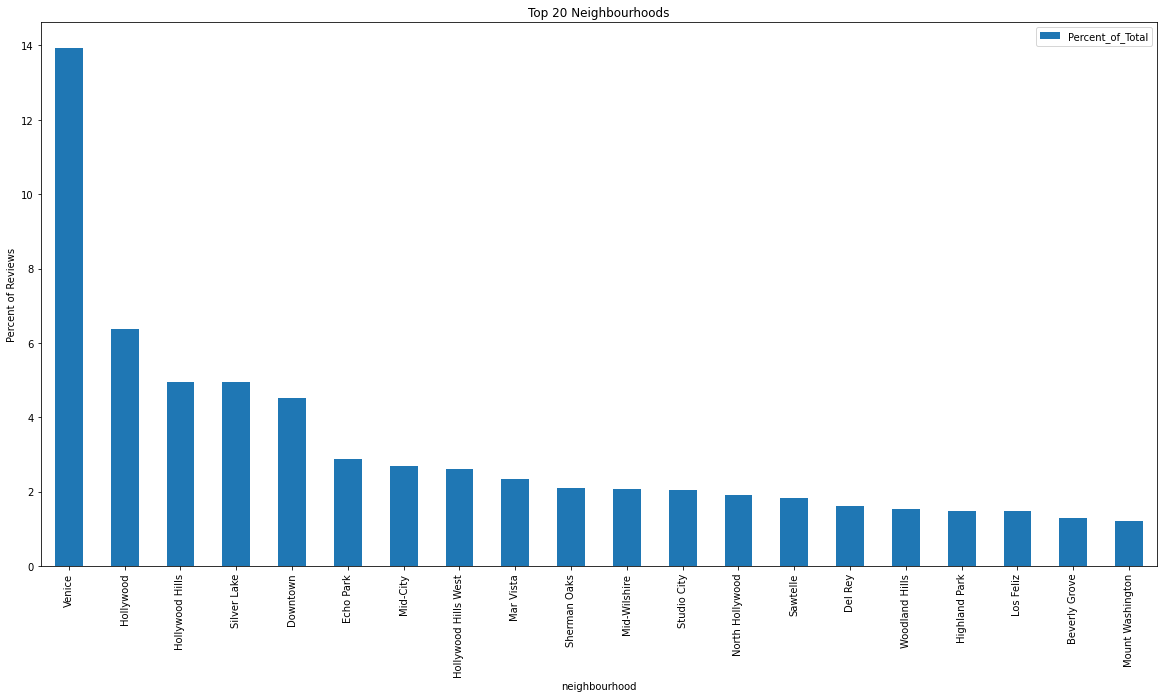

In [125]:
df_top_20_percent = df_sorted_total_percent.head(20)
df_top_20_percent.plot(y=["Percent_of_Total"], kind="bar", figsize=(20,10))
plt.ylabel("Percent of Reviews")
plt.title("Top 20 Neighbourhoods")
plt.savefig("../Project-1_ChatGPT-made-this/Resources/percenttotal.png")

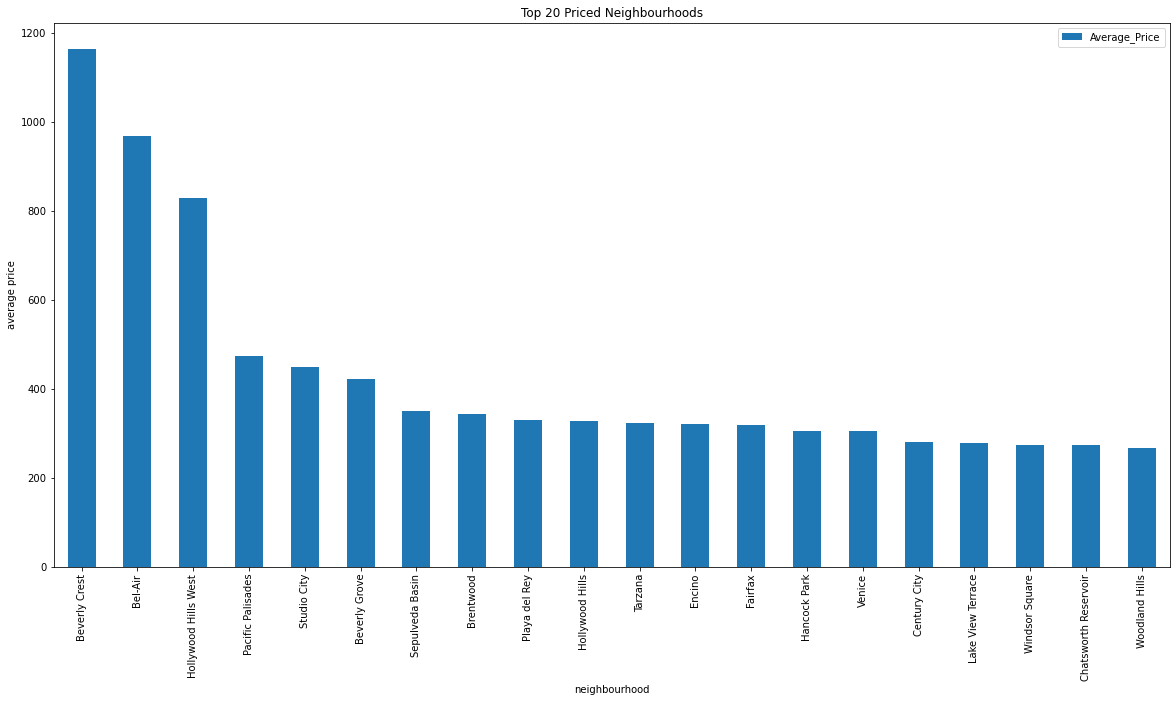

In [84]:
df_top_20_price = df_sorted_average_price.head(20)
df_top_20_price.plot( y=["Average_Price"], kind="bar", figsize=(20,10))
plt.ylabel("average price")
plt.title("Top 20 Priced Neighbourhoods")
plt.savefig("../Project-1_ChatGPT-made-this/Resources/top20averages.png")

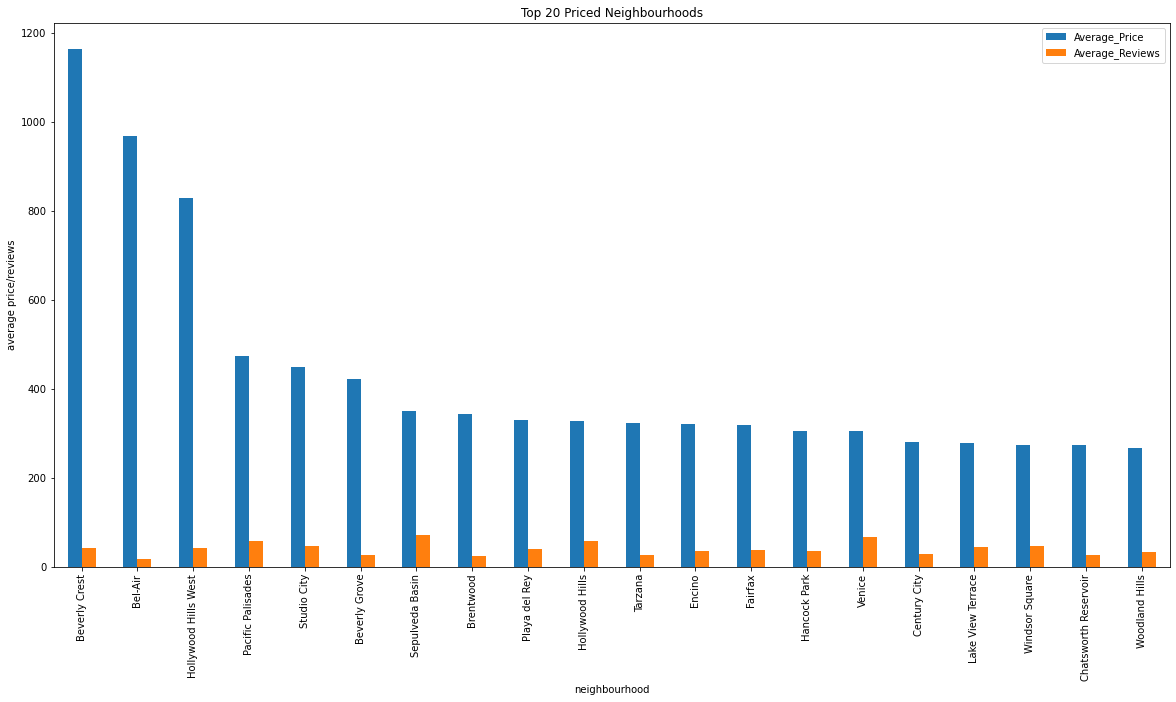

In [85]:
df_top_20_price.plot( y=["Average_Price", "Average_Reviews"], kind="bar", figsize=(20,10))
plt.ylabel("average price/reviews")
plt.title("Top 20 Priced Neighbourhoods")
plt.savefig("../Project-1_ChatGPT-made-this/Resources/averageprice.png")

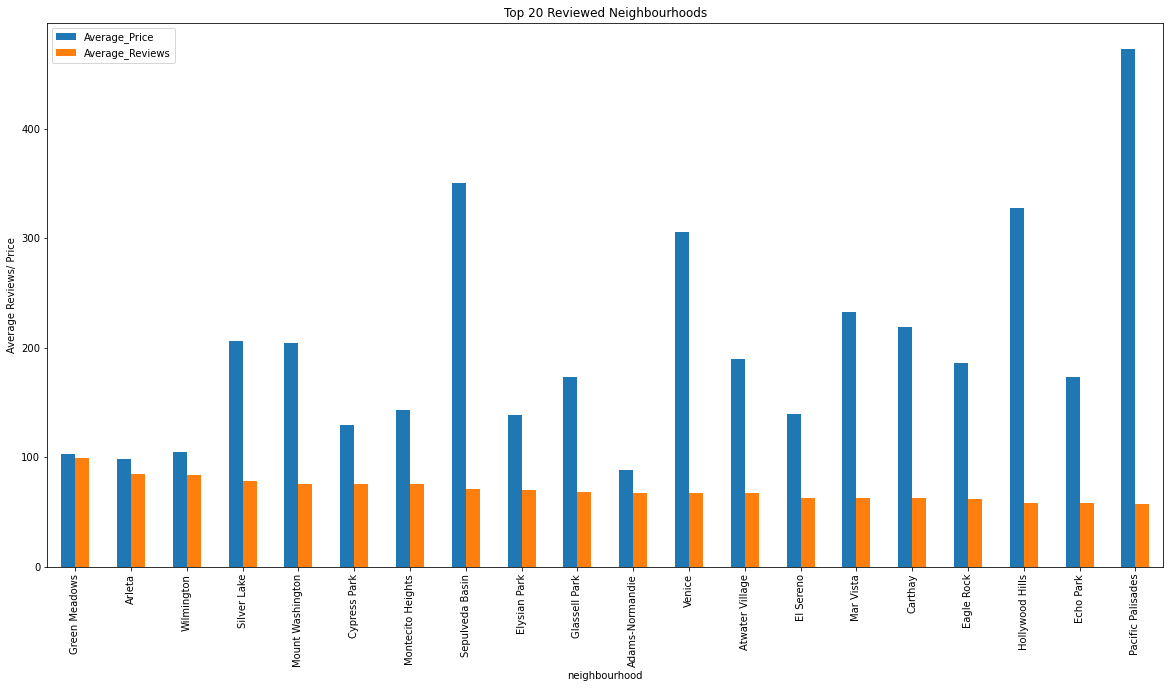

In [86]:
df_top_20_rw = df_sorted_average_rw.head(20)
df_top_20_rw.plot( y=["Average_Price", "Average_Reviews"], kind="bar", figsize=(20,10))
plt.ylabel("Average Reviews/ Price")
plt.title("Top 20 Reviewed Neighbourhoods")
plt.savefig("../Project-1_ChatGPT-made-this/Resources/averagreview.png")

In [140]:
df_outliar_clean_BC=df_Beverly_Crest[(df_Beverly_Crest['price']>0)&
                               (df_Beverly_Crest['price']<=4000)&
                               (df_Beverly_Crest['number_of_reviews']>0)&
                               (df_Beverly_Crest['number_of_reviews']<=300)
                               
                               ]
df_outliar_clean_BC.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Booked_Nights
165,35401350,"Beverly Hills Home +2 Guest Houses, private,Pool",266470657,Nahid,City of Los Angeles,Beverly Crest,34.108180,-118.405500,Entire home/apt,931,3,69,2023-02-01,1.57,15,176,11,HSR22-000380,189
629,45688526,Bel Air Escape - Rustic & Wooded Hillside Home,305794501,Bryan,City of Los Angeles,Beverly Crest,34.108810,-118.444860,Entire home/apt,228,1,231,2023-02-26,7.85,1,103,78,HSR20-000972,262
725,9883695,Hillside 1BD 1BR House edge of Bel Air + Parking,5112516,Kai,City of Los Angeles,Beverly Crest,34.106550,-118.446640,Entire home/apt,170,30,2,2019-08-02,0.04,4,365,0,0,0
731,40941617,Hillside Bungalow + Patio & Parking Bel Air/UCLA,318986626,Haim,City of Los Angeles,Beverly Crest,34.105431,-118.446175,Entire home/apt,165,30,1,2020-03-04,0.03,4,341,0,0,24
736,5198980,Peaceful Beverly Hills Bungalow with amazing v...,7975463,Christopher,City of Los Angeles,Beverly Crest,34.095300,-118.403620,Entire home/apt,693,3,5,2023-02-26,0.71,1,353,5,0,12


The r-value is 0.06718276377050575


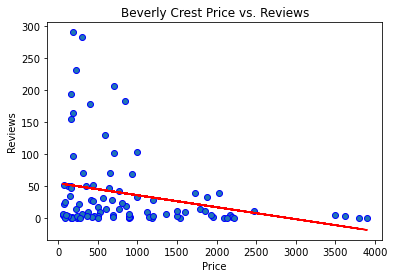

The correlation between both factors is -0.26


<Figure size 432x288 with 0 Axes>

In [123]:
# cleaned out outliars for beverlycrest 
highpriced = df_outliar_clean_BC['price']
highreviews = df_outliar_clean_BC['number_of_reviews']

(slope, intercept, rvalue, pvalue, stderr) = linregress(highpriced, highreviews)
regress_value = highpriced * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(highpriced, highreviews, marker="o", edgecolors= "blue")
plt.plot(highpriced, regress_value, 'red')
plt.title("Beverly Crest Price vs. Reviews")
plt.xlabel('Price')
plt.ylabel("Reviews")
plt.annotate(line_eq,(1000,10000), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")

plt.show()
plt.savefig("../Project-1_ChatGPT-made-this/Resources/regressionhighestprice.png")

correlation = st.pearsonr(highpriced,highreviews)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [133]:
# cleaning out venice neighborhood outliars
df_outliar_clean_venice=df_Venice[(df_Venice['price']>0)&
                               (df_Venice['price']<=2000)&
                               (df_Venice['number_of_reviews']>0)&
                               (df_Venice['number_of_reviews']<=600)]


The r-value is 0.00953713616292347


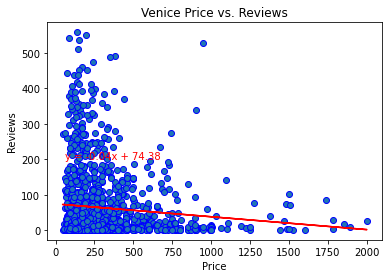

The correlation between both factors is -0.1


In [138]:
# highest reviewed neighborhood
veniceprice = df_outliar_clean_venice['price']
veniceoreview = df_outliar_clean_venice['number_of_reviews']

(slope, intercept, rvalue, pvalue, stderr) = linregress(veniceprice, veniceoreview)
regress_value = veniceprice * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(veniceprice, veniceoreview, marker="o", edgecolors= "blue")
plt.plot(veniceprice, regress_value, 'red')
plt.title("Venice Price vs. Reviews")
plt.xlabel('Price')
plt.ylabel("Reviews")
plt.annotate(line_eq,(60,200), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")

plt.savefig("../Project-1_ChatGPT-made-this/Resources/regressionhighesreview.png")
plt.show()

correlation = st.pearsonr(veniceprice,veniceoreview)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [139]:
# grabbing a sample set of 30% from the LA clean data for plotting.
df_sample_set = df_clean_LA.sample(frac=0.20)
df_sample_set.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Booked_Nights
25432,15097821,Simple Living Space,54364728,Janeth,City of Los Angeles,Westlake,34.05755,-118.28659,Private room,56,30,93,2019-07-27,1.18,1,0,0,0,365
31472,45088384,Beautiful one bedroom apartment,33051546,Joanne/Sam,City of Los Angeles,Valley Village,34.16916,-118.39650,Entire home/apt,91,30,1,2022-08-20,0.15,3,344,1,0,21
23655,773403433340631787,Amazing 1 Bedroom at West LA,377558714,Greg,City of Los Angeles,Sawtelle,34.04839,-118.44822,Entire home/apt,142,1,2,2023-01-25,1.09,29,291,2,0,74
13314,43882624,HollywoodDELUXE Suite w/Balcony|Free Parkng|2B...,4955218,Deluxe Suites,City of Los Angeles,Hollywood,34.09266,-118.32814,Entire home/apt,261,2,11,2022-10-10,0.77,22,333,9,0,32
17285,716915315905747001,"Victoria Private Bedroom 1 + parking, pet ok",14936368,Andy,City of Los Angeles,Hyde Park,33.98340,-118.33350,Private room,35,30,1,2022-11-03,0.24,78,0,1,0,365


The r-value is 0.00307793412046166


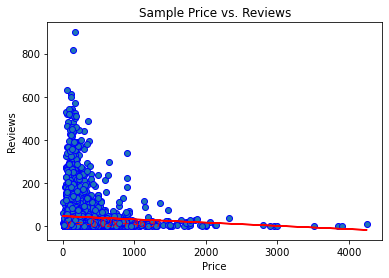

The correlation between both factors is -0.06


In [92]:
# graphing the correlation and r line regression for prices and reviews
LAprice = df_sample_set['price']
LAreview = df_sample_set['number_of_reviews']

(slope, intercept, rvalue, pvalue, stderr) = linregress(LAprice, LAreview)
regress_value = LAprice * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(LAprice, LAreview, marker="o", edgecolors= "blue")
plt.plot(LAprice, regress_value, 'red')
plt.title("Sample Price vs. Reviews")
plt.xlabel('Price')
plt.ylabel("Reviews")
plt.annotate(line_eq,(50,2), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")

plt.show()

correlation = st.pearsonr(LAprice,LAreview)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [95]:
# filtering out outliars from df for medians
df_medians_filterd= df_medians[(df_medians['Median_Price']>0)&
                               (df_medians['Median_Price']<=300)&
                               (df_medians['Median_Reviews']>0)&
                               (df_medians['Median_Reviews']<=40)
                               
                               ]
df_medians_filterd

,Median_Price,Median_Reviews,Median_Listing,Median_Booking_yr,Median_Nights_Booked,Percent_of_Total
neighbourhood,,,,,,
Adams-Normandie,62.5,30.5,3.5,201.5,30.0,0.256547
Arleta,71.5,33.0,1.5,59.5,30.0,0.080033
Arlington Heights,41.0,5.5,19.0,275.5,30.0,0.498385
Atwater Village,145.0,21.0,1.0,245.0,30.0,0.971305
Baldwin Hills/Crenshaw,100.0,9.0,1.0,271.0,30.0,0.287232
...,...,...,...,...,...,...
Westwood,150.0,9.0,3.0,214.0,30.0,0.888742
Wilmington,92.5,29.0,1.0,241.0,30.0,0.106288
Windsor Square,147.5,9.5,1.0,185.5,30.0,0.195337


The r-value is 0.007030811331459489
The correlation between both factors is 0.08


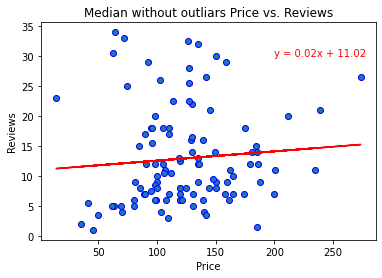

In [117]:
# filtered out outliars to get a data set with a more controlled median group
filtered_price = df_medians_filterd['Median_Price']
filtered_review = df_medians_filterd['Median_Reviews']

(slope, intercept, rvalue, pvalue, stderr) = linregress(filtered_price, filtered_review)
regress_value = filtered_price * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(filtered_price, filtered_review, marker="o", edgecolors= "blue")
plt.plot(filtered_price, regress_value, 'red')
plt.title("Median without outliars Price vs. Reviews")
plt.xlabel('Price')
plt.ylabel("Reviews")
plt.annotate(line_eq,(200,30), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")


correlation = st.pearsonr(filtered_price,filtered_review)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("../Project-1_ChatGPT-made-this/Resources/median_per_neighbourhood.png")
plt.show()


In [98]:
df_clean_LA.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Booked_Nights
6,51859630,"Single BR with King size bed, and shared bathroom",28407733,Arthur,City of Los Angeles,San Pedro,33.73928,-118.299110,Private room,55,2,3,2023-02-24,3.00,1,1,3,0,364
62,692376005462364487,Guesthouse in Los Ángeles,474760371,Mario,City of Los Angeles,Northridge,34.25615,-118.547287,Entire home/apt,175,2,13,2023-03-05,2.12,1,347,13,HSR22-002700,18
63,706447553284084730,Luxurious Villa w/ Lap Pool Outdoor Kitchen,410194448,Andrik,City of Los Angeles,Granada Hills,34.26513,-118.509430,Entire home/apt,725,2,10,2023-02-23,2.94,24,294,10,HSR22-003535,71
64,37542116,"Private guesthouse CSUN, Studio City, Hollywood",283511617,Cynthia,City of Los Angeles,Granada Hills,34.27339,-118.492320,Entire home/apt,135,30,57,2020-08-23,1.31,1,365,0,HSR19-004213,0
85,50031523,Ocean/Mountain/Getty View. Walk to beach. Rare...,403528032,Sean,City of Los Angeles,Pacific Palisades,34.04404,-118.562740,Entire home/apt,710,30,3,2021-10-03,0.15,1,259,0,HSR21-001582,106


In [114]:
# cleaning out outliars for LA
df_outliar_clean_LA=df_clean_LA[(df_clean_LA['price']>0)&
                               (df_clean_LA['price']<=1000)&
                               (df_clean_LA['number_of_reviews']>0)&
                               (df_clean_LA['number_of_reviews']<=500)
                               
                               ]
df_outliar_clean_LA

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Booked_Nights
6,51859630,"Single BR with King size bed, and shared bathroom",28407733,Arthur,City of Los Angeles,San Pedro,33.73928,-118.299110,Private room,55,2,3,2023-02-24,3.00,1,1,3,0,364
62,692376005462364487,Guesthouse in Los Ángeles,474760371,Mario,City of Los Angeles,Northridge,34.25615,-118.547287,Entire home/apt,175,2,13,2023-03-05,2.12,1,347,13,HSR22-002700,18
63,706447553284084730,Luxurious Villa w/ Lap Pool Outdoor Kitchen,410194448,Andrik,City of Los Angeles,Granada Hills,34.26513,-118.509430,Entire home/apt,725,2,10,2023-02-23,2.94,24,294,10,HSR22-003535,71
64,37542116,"Private guesthouse CSUN, Studio City, Hollywood",283511617,Cynthia,City of Los Angeles,Granada Hills,34.27339,-118.492320,Entire home/apt,135,30,57,2020-08-23,1.31,1,365,0,HSR19-004213,0
85,50031523,Ocean/Mountain/Getty View. Walk to beach. Rare...,403528032,Sean,City of Los Angeles,Pacific Palisades,34.04404,-118.562740,Entire home/apt,710,30,3,2021-10-03,0.15,1,259,0,HSR21-001582,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,610848397189198077,East Hollywood - Melrose Living,451963672,Ari,City of Los Angeles,East Hollywood,34.08831,-118.305650,Entire home/apt,70,30,1,2022-08-31,0.16,9,315,1,0,50
42419,46698658,"Spacious condo, spectacular Echo Park lake views!",3715553,Tim,City of Los Angeles,Echo Park,34.07123,-118.263130,Entire home/apt,145,30,10,2022-12-01,0.38,1,75,3,0,290
42424,8883210,Hollywood - Single private room,13158011,Nadia & Pavel,City of Los Angeles,East Hollywood,34.09502,-118.293470,Private room,45,31,9,2021-04-01,0.14,7,312,0,0,53
42427,768926579588946366,Modern 1bed apt near K-Town LA,392789878,Robert,City of Los Angeles,Fairfax,34.08848,-118.346180,Entire home/apt,215,2,5,2023-02-03,1.58,24,70,5,0,295


The r-value is 0.00021184370204368946
The correlation between both factors is -0.01


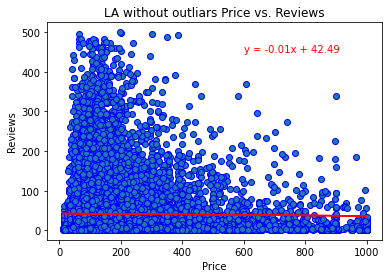

In [119]:
# filtered out outliars to get a data set with a more controlled review and price group for LA
la_outliar_price = df_outliar_clean_LA['price']
la_outliar_review = df_outliar_clean_LA['number_of_reviews']

(slope, intercept, rvalue, pvalue, stderr) = linregress(la_outliar_price, la_outliar_review)
regress_value = la_outliar_price * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(la_outliar_price, la_outliar_review, marker="o", edgecolors= "blue")
plt.plot(la_outliar_price, regress_value, 'red')
plt.title("LA without outliars Price vs. Reviews")
plt.xlabel('Price')
plt.ylabel("Reviews")
plt.annotate(line_eq,(600,450), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")


correlation = st.pearsonr(la_outliar_price,la_outliar_review)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("../Project-1_ChatGPT-made-this/Resources/outliars_cleared.png")
plt.show()